In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


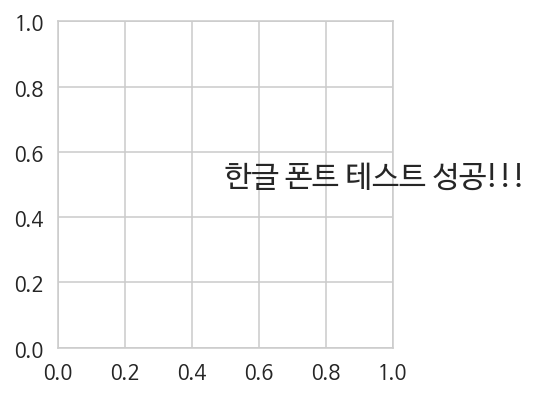

In [ ]:
# 그래프 한글폰트 사용설정 in Colab

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [ ]:
df = pd.read_table('/content/drive/MyDrive/2021 문화관광/DataSet/NATIVE_RE.txt', sep='|',error_bad_lines=True,dtype={'cln_age_r':np.str})

In [ ]:
df.head()

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
95,충북,대전,동구,여행,교통,F,20,201701,WHITE,휴식,123274128,10231
96,경북,대전,동구,여행,교통,M,30,201701,RED,휴식,95719488,7363
99,경북,대전,동구,여행,교통,F,30,201701,WHITE,휴식,188659152,12908
102,광주,대전,동구,여행,교통,F,20,201701,WHITE,활동,201232160,5600
104,인천,대전,동구,여행,교통,M,50,201701,RED,휴식,39237696,1976


In [ ]:
df.columns = ['회원거주지', '가맹점주소', '시군구', '업종대분류', '업종소분류', '성별', '연령대', '이용연월','요일', '이용시간대', '취급액', '이용건수']

In [ ]:
df.columns

Index(['회원거주지', '가맹점주소', '시군구', '업종대분류', '업종소분류', '성별', '연령대', '이용연월', '요일',
       '이용시간대', '취급액', '이용건수'],
      dtype='object')

In [ ]:
df = df.loc[(df['업종대분류'] == '여행') & (df['회원거주지'] != df['가맹점주소'])] # 여행데이터만 추출

In [ ]:
df.dropna(subset=['회원거주지','연령대'], how='any', axis=0, inplace=True)
df.isna().sum()

회원거주지    0
가맹점주소    0
시군구      0
업종대분류    0
업종소분류    0
성별       0
연령대      0
이용연월     0
요일       0
이용시간대    0
취급액      0
이용건수     0
dtype: int64

In [ ]:
df.head()

,회원거주지,가맹점주소,시군구,업종대분류,업종소분류,성별,연령대,이용연월,요일,이용시간대,취급액,이용건수
95,충북,대전,동구,여행,교통,F,20,201701,WHITE,휴식,123274128,10231
96,경북,대전,동구,여행,교통,M,30,201701,RED,휴식,95719488,7363
99,경북,대전,동구,여행,교통,F,30,201701,WHITE,휴식,188659152,12908
102,광주,대전,동구,여행,교통,F,20,201701,WHITE,활동,201232160,5600
104,인천,대전,동구,여행,교통,M,50,201701,RED,휴식,39237696,1976


In [ ]:
# 필요한 변수만 뽑기
tour = df[['회원거주지','가맹점주소','업종소분류','이용연월','이용건수']].copy()
tour.head()

,회원거주지,가맹점주소,업종소분류,이용연월,이용건수
95,충북,대전,교통,201701,10231
96,경북,대전,교통,201701,7363
99,경북,대전,교통,201701,12908
102,광주,대전,교통,201701,5600
104,인천,대전,교통,201701,1976


In [ ]:
# 교통 제거
tour = tour[tour['업종소분류'] != '교통']

In [ ]:
tour.sort_values(by='이용연월',inplace=True)
tour['이용연월'] = tour['이용연월'].astype('str')
tour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110396 entries, 143 to 48541892
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   회원거주지   object
 1   가맹점주소   object
 2   업종소분류   object
 3   이용연월    object
 4   이용건수    int64 
dtypes: int64(1), object(4)
memory usage: 233.9+ MB


In [523]:
sum_of_v1_gv2 = tour.groupby(['회원거주지','가맹점주소','업종소분류','이용연월'])['이용건수'].sum().reset_index().sort_values(by=['업종소분류','이용연월'])
sum_of_v1_gv2.head()

,회원거주지,가맹점주소,업종소분류,이용연월,이용건수
0,강원,경기,관광쇼핑,201701,221
212,강원,경남,관광쇼핑,201701,79
387,강원,경북,관광쇼핑,201701,153
572,강원,광주,관광쇼핑,201701,8
703,강원,대구,관광쇼핑,201701,162


In [524]:
sum_of_v1_gv2[(sum_of_v1_gv2['회원거주지'] == '경기')& (sum_of_v1_gv2['업종소분류'] == '관광쇼핑')]

,회원거주지,가맹점주소,업종소분류,이용연월,이용건수
2867,경기,강원,관광쇼핑,201701,4648
3079,경기,경남,관광쇼핑,201701,693
3291,경기,경북,관광쇼핑,201701,1248
3500,경기,광주,관광쇼핑,201701,13
3699,경기,대구,관광쇼핑,201701,2179
...,...,...,...,...,...
5126,경기,전남,관광쇼핑,202105,1986
5338,경기,전북,관광쇼핑,202105,1751
5545,경기,제주,관광쇼핑,202105,190825
5757,경기,충남,관광쇼핑,202105,2187


In [ ]:
sum_of_v1_gv2['가맹_업종'] = sum_of_v1_gv2['가맹점주소'] + '_' + sum_of_v1_gv2['업종소분류']
sum_of_v1_gv2 = sum_of_v1_gv2[['이용연월','회원거주지','가맹_업종','이용건수']]

In [442]:
sum_of_v1_gv2.head()

,이용연월,회원거주지,가맹_업종,이용건수
0,201701,강원,경기_관광쇼핑,221
212,201701,강원,경남_관광쇼핑,79
387,201701,강원,경북_관광쇼핑,153
572,201701,강원,광주_관광쇼핑,8
703,201701,강원,대구_관광쇼핑,162


In [ ]:
sum_of_v1_gv2

,이용연월,회원거주지,가맹_업종,이용건수
0,201701,강원,경기_관광쇼핑,221
212,201701,강원,경남_관광쇼핑,79
387,201701,강원,경북_관광쇼핑,153
572,201701,강원,광주_관광쇼핑,8
703,201701,강원,대구_관광쇼핑,162
...,...,...,...,...
49365,202105,충북,인천_체험,597
49577,202105,충북,전남_체험,1905
49763,202105,충북,전북_체험,1791
49975,202105,충북,제주_체험,4781


In [ ]:
id = sum_of_v1_gv2.pivot(index=['이용연월','회원거주지'], columns='가맹_업종', values='이용건수').reset_index()
id.fillna(value=0, inplace=True)

In [ ]:
id

가맹_업종,이용연월,회원거주지,강원_관광쇼핑,강원_숙박,강원_여행사,강원_체험,경기_관광쇼핑,경기_숙박,경기_여행사,경기_체험,경남_관광쇼핑,경남_숙박,경남_여행사,경남_체험,경북_관광쇼핑,경북_숙박,경북_여행사,경북_체험,광주_관광쇼핑,광주_숙박,광주_여행사,광주_체험,대구_관광쇼핑,대구_숙박,대구_여행사,대구_체험,대전_관광쇼핑,대전_숙박,대전_여행사,대전_체험,부산_관광쇼핑,부산_숙박,부산_여행사,부산_체험,서울_관광쇼핑,서울_숙박,서울_여행사,서울_체험,세종_관광쇼핑,세종_숙박,세종_여행사,세종_체험,울산_관광쇼핑,울산_숙박,울산_여행사,울산_체험,인천_관광쇼핑,인천_숙박,인천_여행사,인천_체험,전남_관광쇼핑,전남_숙박,전남_여행사,전남_체험,전북_관광쇼핑,전북_숙박,전북_여행사,전북_체험,제주_관광쇼핑,제주_숙박,제주_여행사,제주_체험,충남_관광쇼핑,충남_숙박,충남_여행사,충남_체험,충북_관광쇼핑,충북_숙박,충북_여행사,충북_체험
0,201701,강원,0.0,0.0,0.0,0.0,221.0,13790.0,20.0,1852.0,79.0,2014.0,0.0,261.0,153.0,4030.0,12.0,3287.0,8.0,559.0,0.0,43.0,162.0,1121.0,0.0,238.0,60.0,1252.0,4.0,107.0,548.0,2992.0,4.0,802.0,4363.0,16779.0,3752.0,4206.0,4.0,45.0,0.0,0.0,0.0,441.0,13.0,4.0,16501.0,2630.0,4.0,193.0,185.0,1205.0,29.0,449.0,214.0,1255.0,0.0,314.0,12525.0,2786.0,173.0,1092.0,48.0,1918.0,0.0,807.0,25.0,3338.0,0.0,421.0
1,201701,경기,4648.0,296407.0,1330.0,7016.0,0.0,0.0,0.0,0.0,693.0,19672.0,4.0,2176.0,1248.0,23983.0,71.0,10650.0,13.0,6856.0,12.0,131.0,2179.0,9277.0,12.0,1120.0,199.0,10870.0,26.0,646.0,2966.0,30597.0,68.0,7695.0,65871.0,241374.0,30996.0,69583.0,21.0,1079.0,4.0,4.0,16.0,5634.0,196.0,39.0,189316.0,38220.0,164.0,6553.0,2211.0,14858.0,282.0,5202.0,2645.0,22820.0,21.0,3525.0,135940.0,34952.0,1605.0,10844.0,576.0,43605.0,13.0,15615.0,322.0,19473.0,8.0,1407.0
2,201701,경남,255.0,11837.0,127.0,505.0,188.0,7831.0,34.0,1204.0,0.0,0.0,0.0,0.0,391.0,10123.0,4.0,4918.0,0.0,903.0,4.0,51.0,449.0,3202.0,92.0,1697.0,25.0,1635.0,4.0,227.0,19830.0,24064.0,147.0,5691.0,2090.0,10867.0,4605.0,1424.0,0.0,76.0,0.0,0.0,72.0,4321.0,111.0,171.0,6742.0,1607.0,8.0,95.0,782.0,4177.0,96.0,1926.0,447.0,13478.0,0.0,902.0,25909.0,6074.0,205.0,2092.0,49.0,2660.0,0.0,456.0,16.0,1494.0,0.0,128.0
3,201701,경북,316.0,20631.0,152.0,613.0,112.0,8036.0,8.0,2025.0,149.0,5842.0,0.0,1249.0,0.0,0.0,0.0,0.0,0.0,699.0,0.0,42.0,1944.0,10209.0,113.0,6284.0,56.0,1411.0,0.0,413.0,7712.0,6482.0,16.0,1960.0,2062.0,9259.0,3672.0,1279.0,4.0,114.0,0.0,0.0,8.0,3190.0,108.0,67.0,9555.0,1848.0,4.0,74.0,344.0,1846.0,51.0,680.0,146.0,7210.0,0.0,311.0,16218.0,3414.0,185.0,1513.0,32.0,2605.0,0.0,595.0,38.0,3460.0,0.0,339.0
4,201701,광주,104.0,4770.0,76.0,166.0,32.0,4619.0,16.0,551.0,155.0,2386.0,0.0,324.0,111.0,1384.0,0.0,904.0,0.0,0.0,0.0,0.0,151.0,499.0,9.0,82.0,16.0,866.0,0.0,155.0,1443.0,2590.0,13.0,857.0,1802.0,7458.0,1909.0,760.0,0.0,72.0,0.0,0.0,0.0,286.0,4.0,0.0,10885.0,1061.0,4.0,105.0,1266.0,12301.0,145.0,8571.0,216.0,14127.0,4.0,647.0,14239.0,3427.0,196.0,1005.0,50.0,2268.0,0.0,616.0,4.0,717.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,202105,전남,135.0,1920.0,80.0,270.0,30.0,3829.0,30.0,590.0,602.0,3448.0,15.0,2634.0,100.0,1909.0,5.0,780.0,105.0,5368.0,5.0,3695.0,15.0,390.0,0.0,45.0,0.0,580.0,0.0,100.0,200.0,2603.0,0.0,798.0,235.0,4752.0,405.0,650.0,0.0,105.0,0.0,0.0,0.0,215.0,0.0,10.0,130.0,920.0,5.0,145.0,0.0,0.0,0.0,0.0,420.0,2282.0,5.0,2256.0,16298.0,5893.0,35.0,2826.0,30.0,1872.0,0.0,465.0,5.0,736.0,0.0,220.0
897,202105,전북,195.0,3049.0,125.0,425.0,120.0,4227.0,60.0,1072.0,281.0,2379.0,0.0,1253.0,210.0,1505.0,5.0,960.0,35.0,1180.0,0.0,676.0,5.0,530.0,0.0,40.0,15.0,955.0,0.0,1199.0,95.0,1719.0,0.0,555.0,180.0,5244.0,967.0,1408.0,0.0,75.0,0.0,20.0,0.0,565.0,0.0,5.0,145.0,975.0,0.0,155.0,856.0,5959.0,125.0,8331.0,0.0,0.0,0.0,0.0,12715.0,4651.0,115.0,2298.0,506.0,5371.0,5.0,6294.0,5.0,1035.0,0.0,445.0
898,202105,제주,40.0,615.0,35.0,155.0,30.0,1292.0,15.0,270.0,115.0,420.0,0.0,150.0,70.0,435.0,0.0,281.0,0.0,345.0,0.0,55.0,0.0,230.0,0.0,10.0,0.0,105.0,0.0,10.0,145.0,1165.0,0.0,290.0,531.0,3567.0,170.0,265.0,0.0,10.0,0.0,5.0,0.0,160.0,25.0,0.0,105.0,380.0,0.0,40.0,20.0,870.0,5.0,150.0,15.0,240.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,260.0,0.0,115.0,5.0,170.0,0.0,55.0
899,202105,충남,550.0,8610.0

In [500]:
df_before = id[id['이용연월'] <= '201912'].copy()
df_after = id[id['이용연월'] >= '202001'].copy()

In [501]:
df_before

가맹_업종,이용연월,회원거주지,강원_관광쇼핑,강원_숙박,강원_여행사,강원_체험,경기_관광쇼핑,경기_숙박,경기_여행사,경기_체험,경남_관광쇼핑,경남_숙박,경남_여행사,경남_체험,경북_관광쇼핑,경북_숙박,경북_여행사,경북_체험,광주_관광쇼핑,광주_숙박,광주_여행사,광주_체험,대구_관광쇼핑,대구_숙박,대구_여행사,대구_체험,대전_관광쇼핑,대전_숙박,대전_여행사,대전_체험,부산_관광쇼핑,부산_숙박,부산_여행사,부산_체험,서울_관광쇼핑,서울_숙박,서울_여행사,서울_체험,세종_관광쇼핑,세종_숙박,세종_여행사,세종_체험,울산_관광쇼핑,울산_숙박,울산_여행사,울산_체험,인천_관광쇼핑,인천_숙박,인천_여행사,인천_체험,전남_관광쇼핑,전남_숙박,전남_여행사,전남_체험,전북_관광쇼핑,전북_숙박,전북_여행사,전북_체험,제주_관광쇼핑,제주_숙박,제주_여행사,제주_체험,충남_관광쇼핑,충남_숙박,충남_여행사,충남_체험,충북_관광쇼핑,충북_숙박,충북_여행사,충북_체험
0,201701,강원,0.0,0.0,0.0,0.0,221.0,13790.0,20.0,1852.0,79.0,2014.0,0.0,261.0,153.0,4030.0,12.0,3287.0,8.0,559.0,0.0,43.0,162.0,1121.0,0.0,238.0,60.0,1252.0,4.0,107.0,548.0,2992.0,4.0,802.0,4363.0,16779.0,3752.0,4206.0,4.0,45.0,0.0,0.0,0.0,441.0,13.0,4.0,16501.0,2630.0,4.0,193.0,185.0,1205.0,29.0,449.0,214.0,1255.0,0.0,314.0,12525.0,2786.0,173.0,1092.0,48.0,1918.0,0.0,807.0,25.0,3338.0,0.0,421.0
1,201701,경기,4648.0,296407.0,1330.0,7016.0,0.0,0.0,0.0,0.0,693.0,19672.0,4.0,2176.0,1248.0,23983.0,71.0,10650.0,13.0,6856.0,12.0,131.0,2179.0,9277.0,12.0,1120.0,199.0,10870.0,26.0,646.0,2966.0,30597.0,68.0,7695.0,65871.0,241374.0,30996.0,69583.0,21.0,1079.0,4.0,4.0,16.0,5634.0,196.0,39.0,189316.0,38220.0,164.0,6553.0,2211.0,14858.0,282.0,5202.0,2645.0,22820.0,21.0,3525.0,135940.0,34952.0,1605.0,10844.0,576.0,43605.0,13.0,15615.0,322.0,19473.0,8.0,1407.0
2,201701,경남,255.0,11837.0,127.0,505.0,188.0,7831.0,34.0,1204.0,0.0,0.0,0.0,0.0,391.0,10123.0,4.0,4918.0,0.0,903.0,4.0,51.0,449.0,3202.0,92.0,1697.0,25.0,1635.0,4.0,227.0,19830.0,24064.0,147.0,5691.0,2090.0,10867.0,4605.0,1424.0,0.0,76.0,0.0,0.0,72.0,4321.0,111.0,171.0,6742.0,1607.0,8.0,95.0,782.0,4177.0,96.0,1926.0,447.0,13478.0,0.0,902.0,25909.0,6074.0,205.0,2092.0,49.0,2660.0,0.0,456.0,16.0,1494.0,0.0,128.0
3,201701,경북,316.0,20631.0,152.0,613.0,112.0,8036.0,8.0,2025.0,149.0,5842.0,0.0,1249.0,0.0,0.0,0.0,0.0,0.0,699.0,0.0,42.0,1944.0,10209.0,113.0,6284.0,56.0,1411.0,0.0,413.0,7712.0,6482.0,16.0,1960.0,2062.0,9259.0,3672.0,1279.0,4.0,114.0,0.0,0.0,8.0,3190.0,108.0,67.0,9555.0,1848.0,4.0,74.0,344.0,1846.0,51.0,680.0,146.0,7210.0,0.0,311.0,16218.0,3414.0,185.0,1513.0,32.0,2605.0,0.0,595.0,38.0,3460.0,0.0,339.0
4,201701,광주,104.0,4770.0,76.0,166.0,32.0,4619.0,16.0,551.0,155.0,2386.0,0.0,324.0,111.0,1384.0,0.0,904.0,0.0,0.0,0.0,0.0,151.0,499.0,9.0,82.0,16.0,866.0,0.0,155.0,1443.0,2590.0,13.0,857.0,1802.0,7458.0,1909.0,760.0,0.0,72.0,0.0,0.0,0.0,286.0,4.0,0.0,10885.0,1061.0,4.0,105.0,1266.0,12301.0,145.0,8571.0,216.0,14127.0,4.0,647.0,14239.0,3427.0,196.0,1005.0,50.0,2268.0,0.0,616.0,4.0,717.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,201912,전남,145.0,3284.0,110.0,360.0,85.0,4345.0,25.0,904.0,317.0,4492.0,0.0,927.0,90.0,1761.0,5.0,752.0,145.0,8248.0,80.0,1740.0,271.0,665.0,5.0,120.0,0.0,740.0,0.0,137.0,3015.0,3627.0,25.0,1423.0,1429.0,8012.0,2851.0,1581.0,0.0,30.0,0.0,20.0,5.0,594.0,10.0,5.0,6583.0,1377.0,30.0,150.0,0.0,0.0,0.0,0.0,150.0,7041.0,25.0,918.0,14229.0,3991.0,40.0,1642.0,70.0,1560.0,10.0,441.0,0.0,812.0,0.0,95.0
608,201912,전북,190.0,4527.0,95.0,340.0,90.0,5937.0,20.0,1186.0,175.0,2549.0,10.0,686.0,90.0,1886.0,5.0,889.0,20.0,1870.0,10.0,191.0,241.0,550.0,0.0,90.0,10.0,1659.0,0.0,522.0,455.0,2669.0,0.0,1167.0,1949.0,7817.0,2930.0,1998.0,0.0,65.0,0.0,5.0,10.0,585.0,5.0,5.0,10914.0,1491.0,10.0,343.0,599.0,5850.0,90.0,3842.0,0.0,0.0,0.0,0.0,11029.0,3586.0,75.0,1317.0,270.0,4198.0,50.0,3763.0,10.0,1305.0,5.0,320.0
609,201912,제주,85.0,2343.0,20.0,160.0,25.0,2102.0,10.0,261.0,91.0,541.0,0.0,100.0,10.0,657.0,0.0,205.0,5.0,475.0,0.0,25.0,110.0,420.0,0.0,25.0,0.0,280.0,0.0,5.0,577.0,1731.0,20.0,638.0,1342.0,6715.0,2739.0,845.0,0.0,5.0,0.0,0.0,5.0,175.0,15.0,5.0,3457.0,695.0,10.0,130.0,35.0,756.0,20.0,190.0,15.0,415.0,0.0,50.0,0.0,0.0,0.0,0.0,10.0,315.0,10.0,40.0,0.0,346.0,0.0,20.0


In [ ]:
df_before.groupby('회원거주지',as_index=False).head()

df_before.pivot(index=['이용연월','회원거주지'], columns='가맹_업종', values='이용건수').reset_index()

가맹_업종,이용연월,회원거주지,강원_관광쇼핑,강원_숙박,강원_여행사,강원_체험,경기_관광쇼핑,경기_숙박,경기_여행사,경기_체험,경남_관광쇼핑,경남_숙박,경남_여행사,경남_체험,경북_관광쇼핑,경북_숙박,경북_여행사,경북_체험,광주_관광쇼핑,광주_숙박,광주_여행사,광주_체험,대구_관광쇼핑,대구_숙박,대구_여행사,대구_체험,대전_관광쇼핑,대전_숙박,대전_여행사,대전_체험,부산_관광쇼핑,부산_숙박,부산_여행사,부산_체험,서울_관광쇼핑,서울_숙박,서울_여행사,서울_체험,세종_관광쇼핑,세종_숙박,세종_여행사,세종_체험,울산_관광쇼핑,울산_숙박,울산_여행사,울산_체험,인천_관광쇼핑,인천_숙박,인천_여행사,인천_체험,전남_관광쇼핑,전남_숙박,전남_여행사,전남_체험,전북_관광쇼핑,전북_숙박,전북_여행사,전북_체험,제주_관광쇼핑,제주_숙박,제주_여행사,제주_체험,충남_관광쇼핑,충남_숙박,충남_여행사,충남_체험,충북_관광쇼핑,충북_숙박,충북_여행사,충북_체험
0,201701,강원,0.0,0.0,0.0,0.0,221.0,13790.0,20.0,1852.0,79.0,2014.0,0.0,261.0,153.0,4030.0,12.0,3287.0,8.0,559.0,0.0,43.0,162.0,1121.0,0.0,238.0,60.0,1252.0,4.0,107.0,548.0,2992.0,4.0,802.0,4363.0,16779.0,3752.0,4206.0,4.0,45.0,0.0,0.0,0.0,441.0,13.0,4.0,16501.0,2630.0,4.0,193.0,185.0,1205.0,29.0,449.0,214.0,1255.0,0.0,314.0,12525.0,2786.0,173.0,1092.0,48.0,1918.0,0.0,807.0,25.0,3338.0,0.0,421.0
1,201701,경기,4648.0,296407.0,1330.0,7016.0,0.0,0.0,0.0,0.0,693.0,19672.0,4.0,2176.0,1248.0,23983.0,71.0,10650.0,13.0,6856.0,12.0,131.0,2179.0,9277.0,12.0,1120.0,199.0,10870.0,26.0,646.0,2966.0,30597.0,68.0,7695.0,65871.0,241374.0,30996.0,69583.0,21.0,1079.0,4.0,4.0,16.0,5634.0,196.0,39.0,189316.0,38220.0,164.0,6553.0,2211.0,14858.0,282.0,5202.0,2645.0,22820.0,21.0,3525.0,135940.0,34952.0,1605.0,10844.0,576.0,43605.0,13.0,15615.0,322.0,19473.0,8.0,1407.0
2,201701,경남,255.0,11837.0,127.0,505.0,188.0,7831.0,34.0,1204.0,0.0,0.0,0.0,0.0,391.0,10123.0,4.0,4918.0,0.0,903.0,4.0,51.0,449.0,3202.0,92.0,1697.0,25.0,1635.0,4.0,227.0,19830.0,24064.0,147.0,5691.0,2090.0,10867.0,4605.0,1424.0,0.0,76.0,0.0,0.0,72.0,4321.0,111.0,171.0,6742.0,1607.0,8.0,95.0,782.0,4177.0,96.0,1926.0,447.0,13478.0,0.0,902.0,25909.0,6074.0,205.0,2092.0,49.0,2660.0,0.0,456.0,16.0,1494.0,0.0,128.0
3,201701,경북,316.0,20631.0,152.0,613.0,112.0,8036.0,8.0,2025.0,149.0,5842.0,0.0,1249.0,0.0,0.0,0.0,0.0,0.0,699.0,0.0,42.0,1944.0,10209.0,113.0,6284.0,56.0,1411.0,0.0,413.0,7712.0,6482.0,16.0,1960.0,2062.0,9259.0,3672.0,1279.0,4.0,114.0,0.0,0.0,8.0,3190.0,108.0,67.0,9555.0,1848.0,4.0,74.0,344.0,1846.0,51.0,680.0,146.0,7210.0,0.0,311.0,16218.0,3414.0,185.0,1513.0,32.0,2605.0,0.0,595.0,38.0,3460.0,0.0,339.0
4,201701,광주,104.0,4770.0,76.0,166.0,32.0,4619.0,16.0,551.0,155.0,2386.0,0.0,324.0,111.0,1384.0,0.0,904.0,0.0,0.0,0.0,0.0,151.0,499.0,9.0,82.0,16.0,866.0,0.0,155.0,1443.0,2590.0,13.0,857.0,1802.0,7458.0,1909.0,760.0,0.0,72.0,0.0,0.0,0.0,286.0,4.0,0.0,10885.0,1061.0,4.0,105.0,1266.0,12301.0,145.0,8571.0,216.0,14127.0,4.0,647.0,14239.0,3427.0,196.0,1005.0,50.0,2268.0,0.0,616.0,4.0,717.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,201705,전남,246.0,3293.0,92.0,357.0,143.0,5560.0,24.0,3029.0,551.0,2926.0,4.0,1480.0,201.0,2376.0,8.0,1107.0,70.0,9567.0,67.0,2377.0,116.0,595.0,0.0,134.0,37.0,984.0,4.0,645.0,2606.0,3428.0,12.0,936.0,1607.0,7774.0,1715.0,967.0,0.0,119.0,0.0,0.0,4.0,566.0,16.0,4.0,7607.0,1367.0,14.0,298.0,0.0,0.0,0.0,0.0,298.0,3503.0,0.0,1616.0,15170.0,3661.0,127.0,1900.0,89.0,2907.0,4.0,516.0,0.0,906.0,13.0,118.0
81,201705,전북,430.0,4905.0,111.0,551.0,182.0,7320.0,53.0,3706.0,356.0,2637.0,0.0,880.0,181.0,2092.0,8.0,935.0,16.0,2225.0,25.0,455.0,112.0,756.0,0.0,149.0,77.0,1810.0,0.0,2707.0,425.0,2376.0,4.0,741.0,2063.0,8336.0,1576.0,1367.0,0.0,147.0,0.0,0.0,0.0,512.0,13.0,8.0,9327.0,1238.0,4.0,246.0,747.0,3753.0,75.0,8858.0,0.0,0.0,0.0,0.0,13137.0,3347.0,156.0,1798.0,371.0,5340.0,31.0,6170.0,20.0,1459.0,4.0,169.0
82,201705,제주,73.0,1290.0,20.0,60.0,50.0,1725.0,17.0,1027.0,58.0,703.0,0.0,223.0,90.0,695.0,21.0,163.0,0.0,470.0,0.0,36.0,63.0,322.0,0.0,33.0,4.0,208.0,0.0,56.0,805.0,1339.0,14.0,304.0,1624.0,4613.0,1001.0,357.0,4.0,21.0,0.0,0.0,0.0,155.0,334.0,0.0,3169.0,472.0,9.0,58.0,52.0,1069.0,8.0,557.0,113.0,364.0,0.0,169.0,0.0,0.0,0.0,0.0,8.0,507.0,0.0,49.0,17.0,308.0,4.0

In [525]:
df_before

가맹_업종,이용연월,회원거주지,강원_관광쇼핑,강원_숙박,강원_여행사,강원_체험,경기_관광쇼핑,경기_숙박,경기_여행사,경기_체험,경남_관광쇼핑,경남_숙박,경남_여행사,경남_체험,경북_관광쇼핑,경북_숙박,경북_여행사,경북_체험,광주_관광쇼핑,광주_숙박,광주_여행사,광주_체험,대구_관광쇼핑,대구_숙박,대구_여행사,대구_체험,대전_관광쇼핑,대전_숙박,대전_여행사,대전_체험,부산_관광쇼핑,부산_숙박,부산_여행사,부산_체험,서울_관광쇼핑,서울_숙박,서울_여행사,서울_체험,세종_관광쇼핑,세종_숙박,세종_여행사,세종_체험,울산_관광쇼핑,울산_숙박,울산_여행사,울산_체험,인천_관광쇼핑,인천_숙박,인천_여행사,인천_체험,전남_관광쇼핑,전남_숙박,전남_여행사,전남_체험,전북_관광쇼핑,전북_숙박,전북_여행사,전북_체험,제주_관광쇼핑,제주_숙박,제주_여행사,제주_체험,충남_관광쇼핑,충남_숙박,충남_여행사,충남_체험,충북_관광쇼핑,충북_숙박,충북_여행사,충북_체험
0,201701,강원,0.0,0.0,0.0,0.0,221.0,13790.0,20.0,1852.0,79.0,2014.0,0.0,261.0,153.0,4030.0,12.0,3287.0,8.0,559.0,0.0,43.0,162.0,1121.0,0.0,238.0,60.0,1252.0,4.0,107.0,548.0,2992.0,4.0,802.0,4363.0,16779.0,3752.0,4206.0,4.0,45.0,0.0,0.0,0.0,441.0,13.0,4.0,16501.0,2630.0,4.0,193.0,185.0,1205.0,29.0,449.0,214.0,1255.0,0.0,314.0,12525.0,2786.0,173.0,1092.0,48.0,1918.0,0.0,807.0,25.0,3338.0,0.0,421.0
1,201701,경기,4648.0,296407.0,1330.0,7016.0,0.0,0.0,0.0,0.0,693.0,19672.0,4.0,2176.0,1248.0,23983.0,71.0,10650.0,13.0,6856.0,12.0,131.0,2179.0,9277.0,12.0,1120.0,199.0,10870.0,26.0,646.0,2966.0,30597.0,68.0,7695.0,65871.0,241374.0,30996.0,69583.0,21.0,1079.0,4.0,4.0,16.0,5634.0,196.0,39.0,189316.0,38220.0,164.0,6553.0,2211.0,14858.0,282.0,5202.0,2645.0,22820.0,21.0,3525.0,135940.0,34952.0,1605.0,10844.0,576.0,43605.0,13.0,15615.0,322.0,19473.0,8.0,1407.0
2,201701,경남,255.0,11837.0,127.0,505.0,188.0,7831.0,34.0,1204.0,0.0,0.0,0.0,0.0,391.0,10123.0,4.0,4918.0,0.0,903.0,4.0,51.0,449.0,3202.0,92.0,1697.0,25.0,1635.0,4.0,227.0,19830.0,24064.0,147.0,5691.0,2090.0,10867.0,4605.0,1424.0,0.0,76.0,0.0,0.0,72.0,4321.0,111.0,171.0,6742.0,1607.0,8.0,95.0,782.0,4177.0,96.0,1926.0,447.0,13478.0,0.0,902.0,25909.0,6074.0,205.0,2092.0,49.0,2660.0,0.0,456.0,16.0,1494.0,0.0,128.0
3,201701,경북,316.0,20631.0,152.0,613.0,112.0,8036.0,8.0,2025.0,149.0,5842.0,0.0,1249.0,0.0,0.0,0.0,0.0,0.0,699.0,0.0,42.0,1944.0,10209.0,113.0,6284.0,56.0,1411.0,0.0,413.0,7712.0,6482.0,16.0,1960.0,2062.0,9259.0,3672.0,1279.0,4.0,114.0,0.0,0.0,8.0,3190.0,108.0,67.0,9555.0,1848.0,4.0,74.0,344.0,1846.0,51.0,680.0,146.0,7210.0,0.0,311.0,16218.0,3414.0,185.0,1513.0,32.0,2605.0,0.0,595.0,38.0,3460.0,0.0,339.0
4,201701,광주,104.0,4770.0,76.0,166.0,32.0,4619.0,16.0,551.0,155.0,2386.0,0.0,324.0,111.0,1384.0,0.0,904.0,0.0,0.0,0.0,0.0,151.0,499.0,9.0,82.0,16.0,866.0,0.0,155.0,1443.0,2590.0,13.0,857.0,1802.0,7458.0,1909.0,760.0,0.0,72.0,0.0,0.0,0.0,286.0,4.0,0.0,10885.0,1061.0,4.0,105.0,1266.0,12301.0,145.0,8571.0,216.0,14127.0,4.0,647.0,14239.0,3427.0,196.0,1005.0,50.0,2268.0,0.0,616.0,4.0,717.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,201912,전남,145.0,3284.0,110.0,360.0,85.0,4345.0,25.0,904.0,317.0,4492.0,0.0,927.0,90.0,1761.0,5.0,752.0,145.0,8248.0,80.0,1740.0,271.0,665.0,5.0,120.0,0.0,740.0,0.0,137.0,3015.0,3627.0,25.0,1423.0,1429.0,8012.0,2851.0,1581.0,0.0,30.0,0.0,20.0,5.0,594.0,10.0,5.0,6583.0,1377.0,30.0,150.0,0.0,0.0,0.0,0.0,150.0,7041.0,25.0,918.0,14229.0,3991.0,40.0,1642.0,70.0,1560.0,10.0,441.0,0.0,812.0,0.0,95.0
608,201912,전북,190.0,4527.0,95.0,340.0,90.0,5937.0,20.0,1186.0,175.0,2549.0,10.0,686.0,90.0,1886.0,5.0,889.0,20.0,1870.0,10.0,191.0,241.0,550.0,0.0,90.0,10.0,1659.0,0.0,522.0,455.0,2669.0,0.0,1167.0,1949.0,7817.0,2930.0,1998.0,0.0,65.0,0.0,5.0,10.0,585.0,5.0,5.0,10914.0,1491.0,10.0,343.0,599.0,5850.0,90.0,3842.0,0.0,0.0,0.0,0.0,11029.0,3586.0,75.0,1317.0,270.0,4198.0,50.0,3763.0,10.0,1305.0,5.0,320.0
609,201912,제주,85.0,2343.0,20.0,160.0,25.0,2102.0,10.0,261.0,91.0,541.0,0.0,100.0,10.0,657.0,0.0,205.0,5.0,475.0,0.0,25.0,110.0,420.0,0.0,25.0,0.0,280.0,0.0,5.0,577.0,1731.0,20.0,638.0,1342.0,6715.0,2739.0,845.0,0.0,5.0,0.0,0.0,5.0,175.0,15.0,5.0,3457.0,695.0,10.0,130.0,35.0,756.0,20.0,190.0,15.0,415.0,0.0,50.0,0.0,0.0,0.0,0.0,10.0,315.0,10.0,40.0,0.0,346.0,0.0,20.0


In [617]:
# 그냥데이터
before = pd.melt(df_before,id_vars=['이용연월','회원거주지']).rename(columns = {'value' : '이용건수'})
before

,이용연월,회원거주지,가맹_업종,이용건수
0,201701,강원,강원_관광쇼핑,0.0
1,201701,경기,강원_관광쇼핑,4648.0
2,201701,경남,강원_관광쇼핑,255.0
3,201701,경북,강원_관광쇼핑,316.0
4,201701,광주,강원_관광쇼핑,104.0
...,...,...,...,...
41611,201912,전남,충북_체험,95.0
41612,201912,전북,충북_체험,320.0
41613,201912,제주,충북_체험,20.0
41614,201912,충남,충북_체험,911.0


In [618]:
before.dropna(subset=['이용건수'])

,이용연월,회원거주지,가맹_업종,이용건수
0,201701,강원,강원_관광쇼핑,0.0
1,201701,경기,강원_관광쇼핑,4648.0
2,201701,경남,강원_관광쇼핑,255.0
3,201701,경북,강원_관광쇼핑,316.0
4,201701,광주,강원_관광쇼핑,104.0
...,...,...,...,...
41611,201912,전남,충북_체험,95.0
41612,201912,전북,충북_체험,320.0
41613,201912,제주,충북_체험,20.0
41614,201912,충남,충북_체험,911.0


In [619]:
abcd = before_a.groupby(['회원거주지','가맹_업종'],as_index=False).sum()

In [622]:
abcd

,회원거주지,가맹_업종,이용건수,가맹점주소,업종소분류
0,강원,강원_관광쇼핑,0.0,강원,관광쇼핑
1,강원,강원_숙박,0.0,강원,숙박
2,강원,강원_여행사,0.0,강원,여행사
3,강원,강원_체험,0.0,강원,체험
4,강원,경기_관광쇼핑,13003.0,경기,관광쇼핑
5,강원,경기_숙박,476019.0,경기,숙박
6,강원,경기_여행사,3529.0,경기,여행사
7,강원,경기_체험,172963.0,경기,체험
8,강원,경남_관광쇼핑,4914.0,경남,관광쇼핑
9,강원,경남_숙박,84362.0,경남,숙박


In [623]:
abcd['가맹점주소'] = abcd['가맹_업종'].str[:2]
abcd['업종소분류'] = abcd['가맹_업종'].str[3:]


In [624]:
# 여기서 회원거주지 업종소분류 기준으로 총합을 구하고 저기에다가 나눠서 비율구하기 (총 행)
dvdv = abcd.groupby(['회원거주지', '업종소분류','가맹점주소'],as_index=False).sum()
dvdv

,회원거주지,업종소분류,가맹점주소,이용건수
0,강원,관광쇼핑,강원,0.0
1,강원,관광쇼핑,경기,13003.0
2,강원,관광쇼핑,경남,4914.0
3,강원,관광쇼핑,경북,11318.0
4,강원,관광쇼핑,광주,176.0
5,강원,관광쇼핑,대구,7740.0
6,강원,관광쇼핑,대전,1301.0
7,강원,관광쇼핑,부산,14983.0
8,강원,관광쇼핑,서울,136168.0
9,강원,관광쇼핑,세종,64.0


In [625]:
rlawngud = abcd.groupby(['회원거주지', '업종소분류','가맹점주소'],as_index=False).sum()
rlawngud

,회원거주지,업종소분류,가맹점주소,이용건수
0,강원,관광쇼핑,강원,0.0
1,강원,관광쇼핑,경기,13003.0
2,강원,관광쇼핑,경남,4914.0
3,강원,관광쇼핑,경북,11318.0
4,강원,관광쇼핑,광주,176.0
5,강원,관광쇼핑,대구,7740.0
6,강원,관광쇼핑,대전,1301.0
7,강원,관광쇼핑,부산,14983.0
8,강원,관광쇼핑,서울,136168.0
9,강원,관광쇼핑,세종,64.0


In [626]:
dlaxorjs = dvdv.reset_index().groupby(['회원거주지','업종소분류'],as_index=False).sum()
dlaxorjs

,회원거주지,업종소분류,index,이용건수
0,강원,관광쇼핑,136,1321561.0
1,강원,숙박,425,2057257.0
2,강원,여행사,714,163812.0
3,강원,체험,1003,738569.0
4,경기,관광쇼핑,1292,16766219.0
5,경기,숙박,1581,27458662.0
6,경기,여행사,1870,1767371.0
7,경기,체험,2159,7305565.0
8,경남,관광쇼핑,2448,2354984.0
9,경남,숙박,2737,3564393.0


In [627]:
tjsdnwlgns = pd.merge(rlawngud, dlaxorjs, how='left', on=['회원거주지','업종소분류'])
tjsdnwlgns.head()

,회원거주지,업종소분류,가맹점주소,이용건수_x,index,이용건수_y
0,강원,관광쇼핑,강원,0.0,136,1321561.0
1,강원,관광쇼핑,경기,13003.0,136,1321561.0
2,강원,관광쇼핑,경남,4914.0,136,1321561.0
3,강원,관광쇼핑,경북,11318.0,136,1321561.0
4,강원,관광쇼핑,광주,176.0,136,1321561.0


In [628]:
tjsdnwlgns.drop('index', axis=1, inplace=True)

In [629]:

tjsdnwlgns['비율'] = tjsdnwlgns['이용건수_x'] / tjsdnwlgns['이용건수_y'] * 100

In [630]:
tjsdnwlgns.head()

,회원거주지,업종소분류,가맹점주소,이용건수_x,이용건수_y,비율
0,강원,관광쇼핑,강원,0.0,1321561.0,0.000000
1,강원,관광쇼핑,경기,13003.0,1321561.0,0.983912
2,강원,관광쇼핑,경남,4914.0,1321561.0,0.371833
3,강원,관광쇼핑,경북,11318.0,1321561.0,0.856411
4,강원,관광쇼핑,광주,176.0,1321561.0,0.013318


In [615]:
# tjsdnwlgns.drop('index', axis=1, inplace=True)
tjsdnwlgns['비율'] = tjsdnwlgns['이용건수_x'] / tjsdnwlgns['이용건수_y'] * 100
df_dd = pd.pivot_table(data= tjsdnwlgns[tjsdnwlgns['업종소분류']=='체험'], index='가맹점주소', columns='회원거주지', values='비율')

columns = df_dd.columns
for col in columns:
  print(str(col) + '에 거주하는 이용객\n\n', df_dd.sort_values(by=col, ascending = False).head(10)[col], '\n\n')

강원에 거주하는 이용객

 가맹점주소
경기    23.418665
서울    21.826261
경북    14.458500
제주     9.312739
충북     8.050703
부산     6.210117
전남     4.258099
충남     3.762005
전북     2.391652
경남     2.242445
Name: 강원, dtype: float64 


경기에 거주하는 이용객

 가맹점주소
서울    40.807836
제주     9.048513
강원     8.788205
충남     8.664381
경북     6.617544
부산     6.172965
인천     5.877533
전남     5.046249
전북     2.954364
충북     2.771422
Name: 경기, dtype: float64 


경남에 거주하는 이용객

 가맹점주소
부산    30.794730
경북    17.093235
전남    14.379009
제주     9.294486
경기     6.483281
서울     4.963758
대구     4.871787
전북     3.799600
강원     2.397336
충남     1.594301
Name: 경남, dtype: float64 


경북에 거주하는 이용객

 가맹점주소
대구    23.884521
부산    13.319909
경기     9.848761
경남     8.947403
제주     8.656394
전남     7.062189
서울     6.497848
강원     6.210012
충북     4.991807
대전     3.749918
Name: 경북, dtype: float64 


광주에 거주하는 이용객

 가맹점주소
전남    61.189117
전북     7.415018
제주     6.284444
경기     4.043490
서울     3.890721
부산     3.792779
경북     3.540755
충남     3.032365
경남     2.686034

In [616]:
df_dd

회원거주지,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
가맹점주소,,,,,,,,,,,,,,,,,
강원,0.000000,8.788205,2.397336,6.210012,1.219529,3.411871,4.588255,2.382794,8.781951,4.135471,2.650295,6.572085,2.534438,2.214746,3.058732,4.986786,8.214990
경기,23.418665,0.000000,6.483281,9.848761,4.043490,5.966377,10.504487,5.779554,40.400442,9.028577,6.173738,39.375732,10.984447,8.618480,17.881816,23.820731,18.086132
경남,2.242445,2.036229,0.000000,8.947403,2.686034,12.307978,3.482256,39.189514,2.266322,2.139107,14.511685,1.577757,11.505164,3.369073,5.440638,2.596481,2.510840
경북,14.458500,6.617544,17.093235,0.000000,3.540755,37.741191,7.944639,23.242966,7.256062,5.675954,30.661887,5.263411,7.129166,4.606421,9.482569,6.294298,8.652413
광주,0.147312,0.157483,0.247871,0.140065,0.000000,0.066166,0.196387,0.115361,0.159762,0.205777,0.066284,0.126544,14.658865,1.620818,1.275556,0.238932,0.117135
대구,0.812111,0.493555,4.871787,23.884521,0.360467,0.000000,1.113927,2.644970,0.538504,0.680366,2.899400,0.283550,0.854456,0.533548,1.565910,0.676005,0.813538
대전,0.887798,0.521082,1.571100,3.749918,1.527088,1.841805,0.000000,0.541607,0.455943,12.210804,0.624716,0.380122,2.480579,6.523768,1.233505,8.278431,7.823920
부산,6.210117,6.172965,30.794730,13.319909,3.792779,10.797858,7.101231,0.000000,6.539868,4.514899,22.003161,5.018348,9.233201,4.780303,20.131561,6.181321,5.808559
서울,21.826261,40.807836,4.963758,6.497848,3.890721,4.621832,11.068196,4.020287,0.000000,9.610935,3.147966,18.573976,8.532561,8.566519,18.472536,15.894331,11.449172


In [614]:
df_dd

회원거주지,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
가맹점주소,,,,,,,,,,,,,,,,,
강원,0.000000,10.985408,3.369475,6.348652,2.839319,4.383787,5.902317,3.330508,18.134501,5.837176,3.427021,9.275760,3.334489,4.270064,3.846628,6.894003,9.134147
경기,12.423851,0.000000,3.975724,5.335873,3.425276,3.621405,5.604261,3.526746,22.383104,4.504930,3.197284,17.214136,5.662172,5.913377,7.649433,11.468728,8.477504
경남,1.688055,1.389586,0.000000,4.570193,2.139068,5.559529,2.341046,15.890184,1.464140,1.745406,6.685663,1.216103,4.953789,2.432057,2.665163,1.941775,1.762977
경북,5.811856,2.675607,7.282639,0.000000,1.823117,16.314838,3.507358,9.762674,2.854909,2.692994,13.059303,2.297632,2.935350,2.285960,3.530765,2.891124,3.820178
광주,0.326692,0.321675,0.367477,0.257322,0.000000,0.234008,0.386770,0.315045,0.367235,0.273245,0.247139,0.328465,8.857137,1.597296,1.083882,0.407656,0.258473
대구,0.845796,0.585250,2.337662,11.467767,0.601619,0.000000,0.969846,1.864098,0.688954,0.640074,1.915090,0.599954,0.720567,0.640251,1.248154,0.688386,0.755273
대전,0.783211,0.515351,0.850326,1.476618,0.856063,0.864307,0.000000,0.524493,0.569082,6.389891,0.458683,0.476758,1.109395,2.602832,0.805437,3.812054,3.366198
부산,3.201934,2.864978,24.242070,10.616903,3.320902,9.679234,3.771649,0.000000,3.632718,2.603251,18.997591,2.598922,7.325532,3.053421,10.560747,3.197726,2.869258
서울,37.728837,42.313221,27.120649,27.977111,26.877683,28.235954,30.303497,29.374952,0.000000,29.212872,29.040907,35.984013,28.706818,29.839008,40.974121,31.458169,29.832496


In [642]:
after = pd.melt(df_after,id_vars=['이용연월','회원거주지']).rename(columns = {'value' : '이용건수'})


abcd_after = after.groupby(['회원거주지','가맹_업종'],as_index=False).sum()
abcd_after['가맹점주소'] = abcd_after['가맹_업종'].str[:2]
abcd_after['업종소분류'] = abcd_after['가맹_업종'].str[3:]
# 여기서 회원거주지 업종소분류 기준으로 총합을 구하고 저기에다가 나눠서 비율구하기 (총 행)
dvdv_after = abcd_after.groupby(['회원거주지', '업종소분류','가맹점주소'],as_index=False).sum()

rlawngud_a = abcd_after.groupby(['회원거주지', '업종소분류','가맹점주소'],as_index=False).sum()

dlaxorjs_a = dvdv_after.reset_index().groupby(['회원거주지','업종소분류'],as_index=False).sum()


tjsdnwlgns_a = pd.merge(rlawngud_a, dlaxorjs_a, how='left', on=['회원거주지','업종소분류'])


tjsdnwlgns_a.drop('index', axis=1, inplace=True)
tjsdnwlgns_a['비율'] = tjsdnwlgns_a['이용건수_x'] / tjsdnwlgns_a['이용건수_y'] * 100
df_dd_after = pd.pivot_table(data= tjsdnwlgns_a, index='가맹점주소', columns='회원거주지', values='비율')



# columns = df_dd.columns
# for col in columns:
#   print(str(col) + '에 거주하는 이용객\n\n', df_dd.sort_values(by=col, ascending = False).head()[col], '\n\n')

In [643]:
df_dd = pd.pivot_table(data= tjsdnwlgns, index='가맹점주소', columns='회원거주지', values='비율')
df_dd_after = pd.pivot_table(data= tjsdnwlgns_a, index='가맹점주소', columns='회원거주지', values='비율')

In [640]:
pd.set_option('display.float_format', '{:.6f}'.format) # 항상 float 형식으로

In [647]:
rkskekfk = df_dd_after - df_dd

rkskekfk[rkskekfk >= abs(0.3)]

회원거주지,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
가맹점주소,,,,,,,,,,,,,,,,,
강원,nan,1.995726,nan,nan,nan,nan,0.785807,nan,nan,0.891004,nan,0.910815,0.423675,0.336806,0.787128,1.245345,1.080995
경기,nan,nan,nan,nan,nan,nan,nan,nan,6.263551,0.737372,nan,5.513322,nan,nan,0.539984,0.582467,nan
경남,0.568958,0.560022,nan,1.783470,0.713803,1.676473,1.081012,nan,0.379473,1.135405,1.741117,0.444184,2.807283,1.086476,2.426455,0.964915,0.793560
경북,0.478912,nan,0.326120,nan,nan,1.029590,nan,0.350183,nan,0.315900,nan,nan,nan,nan,0.527412,nan,0.597826
광주,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.583110,nan,nan,nan,nan
대구,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
대전,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
부산,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
서울,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.577724,nan,nan


In [651]:
rkskekfk[rkskekfk <= (-0.3)]

회원거주지,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
가맹점주소,,,,,,,,,,,,,,,,,
강원,nan,nan,nan,nan,nan,nan,nan,nan,-0.846136,nan,-0.324320,nan,nan,nan,nan,nan,nan
경기,nan,nan,nan,nan,-0.356256,-0.357731,-0.315649,nan,nan,nan,nan,nan,-0.546546,nan,nan,nan,nan
경남,nan,nan,nan,nan,nan,nan,nan,-0.888985,nan,nan,nan,nan,nan,nan,nan,nan,nan
경북,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.943433,nan,nan,nan,nan,nan,nan
광주,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
대구,nan,nan,-0.873113,-3.451468,nan,nan,-0.448162,-0.787559,nan,nan,-0.671372,nan,nan,nan,nan,nan,nan
대전,nan,nan,-0.321960,-0.487722,-0.351825,-0.338523,nan,nan,nan,-1.554496,nan,nan,-0.462399,-0.930796,nan,-1.221381,-1.029863
부산,-0.768034,nan,-7.645662,-3.568084,-0.987858,-3.580929,-0.975869,nan,-0.516504,-0.358538,-6.906024,-0.387441,-3.571842,-1.016982,-2.725380,-0.722137,-0.619237
서울,-4.180627,-7.354027,-2.101359,-2.080752,-7.356803,-4.345933,-8.329499,-2.393111,nan,-6.383435,-1.011630,-12.076270,-4.216559,-5.544828,nan,-8.875185,-5.873631


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



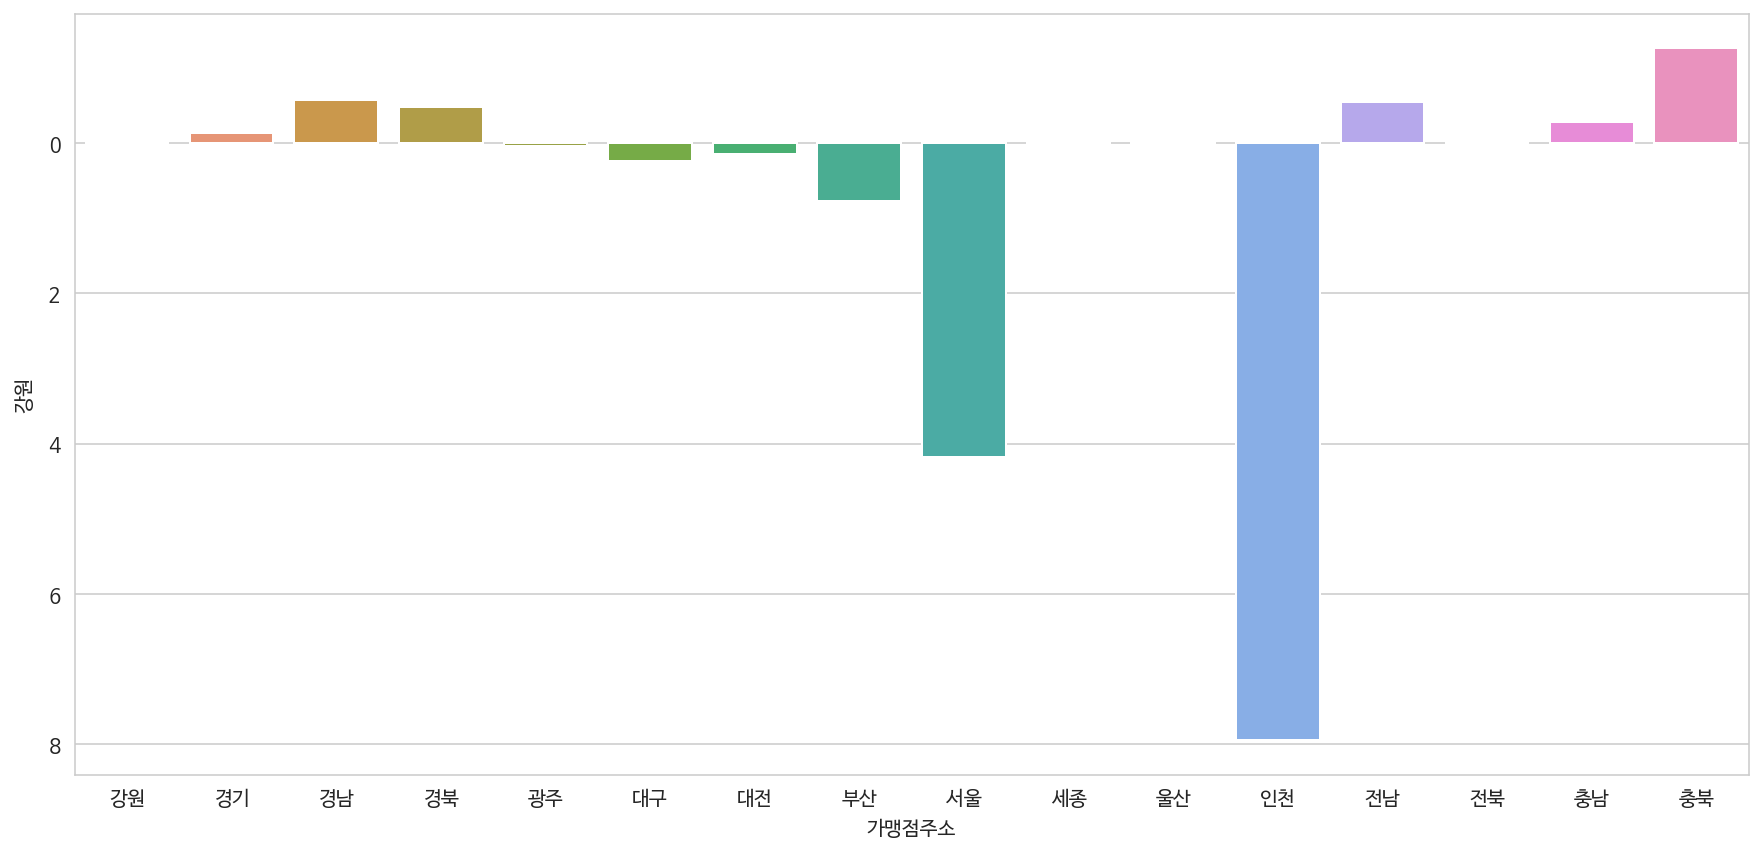

In [665]:
plt.figure(figsize=(15,7))
sns.barplot(data = rkskekfk.reset_index()[rkskekfk.reset_index()['가맹점주소'] !='제주'], x='가맹점주소', y='강원')

In [659]:
sns.barplot(data = rkskekfk, x=rkskekfk.index.values, y='강원')

ValueError: ignored

In [592]:
tjsdnwlgns['비율'].sum()

6800.0

In [544]:
df['업종소분류'].unique()

array(['교통', '숙박', '관광쇼핑', '여행사', '체험'], dtype=object)

In [527]:
before_a.sort_values(by='회원거주지')

,이용연월,회원거주지,가맹_업종,이용건수,key
0,201701,강원,강원_관광쇼핑,0.0,강원_강원_관광쇼핑
26486,201711,강원,울산_체험,4.0,강원_울산_체험
10302,201907,강원,광주_관광쇼핑,0.0,강원_광주_관광쇼핑
34374,201707,강원,제주_관광쇼핑,14396.0,강원_제주_관광쇼핑
39593,201902,강원,충북_관광쇼핑,155.0,강원_충북_관광쇼핑
...,...,...,...,...,...
26162,201903,충북,울산_여행사,35.0,충북_울산_여행사
26145,201902,충북,울산_여행사,45.0,충북_울산_여행사
26128,201901,충북,울산_여행사,10.0,충북_울산_여행사
27012,201705,충북,인천_관광쇼핑,17552.0,충북_인천_관광쇼핑


In [504]:
before_a['key'] = before_a['회원거주지'] + '_' + before_a['가맹_업종']

In [505]:
# 총합데이터
before_b = pd.melt(df_before.groupby('회원거주지',as_index=False).sum(), id_vars=['회원거주지']).rename(columns={'value':'이용건수'})
before_b

,회원거주지,가맹_업종,이용건수
0,강원,강원_관광쇼핑,0.0
1,경기,강원_관광쇼핑,371897.0
2,경남,강원_관광쇼핑,18675.0
3,경북,강원_관광쇼핑,22503.0
4,광주,강원_관광쇼핑,8324.0
...,...,...,...
1151,전남,충북_체험,5148.0
1152,전북,충북_체험,9627.0
1153,제주,충북_체험,1276.0
1154,충남,충북_체험,42088.0


In [506]:
before_b['key'] = before_b['회원거주지'] + '_' + before_b['가맹_업종']

In [539]:
df_to = pd.merge(before_a, before_b, how='left', on='key')
df_to

,이용연월,회원거주지_x,가맹_업종_x,이용건수_x,key,회원거주지_y,가맹_업종_y,이용건수_y
0,201701,강원,강원_관광쇼핑,0.0,강원_강원_관광쇼핑,강원,강원_관광쇼핑,0.0
1,201701,경기,강원_관광쇼핑,4648.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0
2,201701,경남,강원_관광쇼핑,255.0,경남_강원_관광쇼핑,경남,강원_관광쇼핑,18675.0
3,201701,경북,강원_관광쇼핑,316.0,경북_강원_관광쇼핑,경북,강원_관광쇼핑,22503.0
4,201701,광주,강원_관광쇼핑,104.0,광주_강원_관광쇼핑,광주,강원_관광쇼핑,8324.0
...,...,...,...,...,...,...,...,...
41611,201912,전남,충북_체험,95.0,전남_충북_체험,전남,충북_체험,5148.0
41612,201912,전북,충북_체험,320.0,전북_충북_체험,전북,충북_체험,9627.0
41613,201912,제주,충북_체험,20.0,제주_충북_체험,제주,충북_체험,1276.0
41614,201912,충남,충북_체험,911.0,충남_충북_체험,충남,충북_체험,42088.0


In [563]:
df_to[df_to['이용건수_y']].unique()

KeyError: ignored

In [519]:
df_to[df_to['회원거주지_x'] == '경기']

,이용연월,회원거주지_x,가맹_업종_x,이용건수_x,key,회원거주지_y,가맹_업종_y,이용건수_y
1,201701,경기,강원_관광쇼핑,4648.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0
18,201702,경기,강원_관광쇼핑,6689.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0
35,201703,경기,강원_관광쇼핑,6288.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0
52,201704,경기,강원_관광쇼핑,6681.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0
69,201705,경기,강원_관광쇼핑,11627.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0
...,...,...,...,...,...,...,...,...
41532,201908,경기,충북_체험,9747.0,경기_충북_체험,경기,충북_체험,202468.0
41549,201909,경기,충북_체험,6503.0,경기_충북_체험,경기,충북_체험,202468.0
41566,201910,경기,충북_체험,9420.0,경기_충북_체험,경기,충북_체험,202468.0
41583,201911,경기,충북_체험,7706.0,경기_충북_체험,경기,충북_체험,202468.0


In [540]:
df_to['비율'] = (df_to['이용건수_x'] / df_to['이용건수_y']) * 100
df_to

,이용연월,회원거주지_x,가맹_업종_x,이용건수_x,key,회원거주지_y,가맹_업종_y,이용건수_y,비율
0,201701,강원,강원_관광쇼핑,0.0,강원_강원_관광쇼핑,강원,강원_관광쇼핑,0.0,NaN
1,201701,경기,강원_관광쇼핑,4648.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0,1.249808
2,201701,경남,강원_관광쇼핑,255.0,경남_강원_관광쇼핑,경남,강원_관광쇼핑,18675.0,1.365462
3,201701,경북,강원_관광쇼핑,316.0,경북_강원_관광쇼핑,경북,강원_관광쇼핑,22503.0,1.404257
4,201701,광주,강원_관광쇼핑,104.0,광주_강원_관광쇼핑,광주,강원_관광쇼핑,8324.0,1.249399
...,...,...,...,...,...,...,...,...,...
41611,201912,전남,충북_체험,95.0,전남_충북_체험,전남,충북_체험,5148.0,1.845377
41612,201912,전북,충북_체험,320.0,전북_충북_체험,전북,충북_체험,9627.0,3.323985
41613,201912,제주,충북_체험,20.0,제주_충북_체험,제주,충북_체험,1276.0,1.567398
41614,201912,충남,충북_체험,911.0,충남_충북_체험,충남,충북_체험,42088.0,2.164512


In [541]:
df_to.sort_values(by='회원거주지_x')

,이용연월,회원거주지_x,가맹_업종_x,이용건수_x,key,회원거주지_y,가맹_업종_y,이용건수_y,비율
0,201701,강원,강원_관광쇼핑,0.0,강원_강원_관광쇼핑,강원,강원_관광쇼핑,0.0,NaN
26486,201711,강원,울산_체험,4.0,강원_울산_체험,강원,울산_체험,275.0,1.454545
10302,201907,강원,광주_관광쇼핑,0.0,강원_광주_관광쇼핑,강원,광주_관광쇼핑,176.0,0.000000
34374,201707,강원,제주_관광쇼핑,14396.0,강원_제주_관광쇼핑,강원,제주_관광쇼핑,525373.0,2.740148
39593,201902,강원,충북_관광쇼핑,155.0,강원_충북_관광쇼핑,강원,충북_관광쇼핑,1747.0,8.872353
...,...,...,...,...,...,...,...,...,...
26162,201903,충북,울산_여행사,35.0,충북_울산_여행사,충북,울산_여행사,556.0,6.294964
26145,201902,충북,울산_여행사,45.0,충북_울산_여행사,충북,울산_여행사,556.0,8.093525
26128,201901,충북,울산_여행사,10.0,충북_울산_여행사,충북,울산_여행사,556.0,1.798561
27012,201705,충북,인천_관광쇼핑,17552.0,충북_인천_관광쇼핑,충북,인천_관광쇼핑,703023.0,2.496647


In [532]:
df_to = df_to[['이용연월','key', '비율']].dropna(subset=['비율'])

In [538]:
df_to

,이용연월,key,비율
1,201701,경기_강원_관광쇼핑,1.249808
2,201701,경남_강원_관광쇼핑,1.365462
3,201701,경북_강원_관광쇼핑,1.404257
4,201701,광주_강원_관광쇼핑,1.249399
5,201701,대구_강원_관광쇼핑,2.044927
...,...,...,...
41610,201912,인천_충북_체험,2.835136
41611,201912,전남_충북_체험,1.845377
41612,201912,전북_충북_체험,3.323985
41613,201912,제주_충북_체험,1.567398


In [536]:
df_to.groupby(['','비율'])['비율'].sum()

이용연월    비율       
201701  0.000000      0.000000
        0.010781      0.010781
        0.013861      0.013861
        0.062735      0.062735
        0.117388      0.117388
                       ...    
201912  22.988506    22.988506
        23.255814    23.255814
        25.641026    25.641026
        26.666667    26.666667
        55.555556    55.555556
Name: 비율, Length: 34553, dtype: float64

In [537]:
df_to[df_to['key'] == '경기_강원_관광쇼핑'].sum()

이용연월    2017012017022017032017042017052017062017072017...
key     경기_강원_관광쇼핑경기_강원_관광쇼핑경기_강원_관광쇼핑경기_강원_관광쇼핑경기_강원_...
비율                                                    100
dtype: object

In [528]:
df_to

,이용연월,회원거주지_x,가맹_업종_x,이용건수_x,key,회원거주지_y,가맹_업종_y,이용건수_y
0,201701,강원,강원_관광쇼핑,0.0,강원_강원_관광쇼핑,강원,강원_관광쇼핑,0.0
1,201701,경기,강원_관광쇼핑,4648.0,경기_강원_관광쇼핑,경기,강원_관광쇼핑,371897.0
2,201701,경남,강원_관광쇼핑,255.0,경남_강원_관광쇼핑,경남,강원_관광쇼핑,18675.0
3,201701,경북,강원_관광쇼핑,316.0,경북_강원_관광쇼핑,경북,강원_관광쇼핑,22503.0
4,201701,광주,강원_관광쇼핑,104.0,광주_강원_관광쇼핑,광주,강원_관광쇼핑,8324.0
...,...,...,...,...,...,...,...,...
41611,201912,전남,충북_체험,95.0,전남_충북_체험,전남,충북_체험,5148.0
41612,201912,전북,충북_체험,320.0,전북_충북_체험,전북,충북_체험,9627.0
41613,201912,제주,충북_체험,20.0,제주_충북_체험,제주,충북_체험,1276.0
41614,201912,충남,충북_체험,911.0,충남_충북_체험,충남,충북_체험,42088.0


In [511]:
df_to[df_to['key'] == '경기_강원_관광쇼핑']

,key,비율
1,경기_강원_관광쇼핑,1.249808
18,경기_강원_관광쇼핑,1.798616
35,경기_강원_관광쇼핑,1.690791
52,경기_강원_관광쇼핑,1.796465
69,경기_강원_관광쇼핑,3.126403
86,경기_강원_관광쇼핑,2.285848
103,경기_강원_관광쇼핑,4.101673
120,경기_강원_관광쇼핑,6.708040
137,경기_강원_관광쇼핑,2.824438
154,경기_강원_관광쇼핑,4.449888


# 냅두기

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
id.iloc[:,2:] = scaler.fit_transform(id.iloc[:,2:])
id.head()

가맹_업종,이용연월,회원거주지,강원_관광쇼핑,강원_숙박,강원_여행사,강원_체험,경기_관광쇼핑,경기_숙박,경기_여행사,경기_체험,경남_관광쇼핑,경남_숙박,경남_여행사,경남_체험,경북_관광쇼핑,경북_숙박,경북_여행사,경북_체험,광주_관광쇼핑,광주_숙박,광주_여행사,광주_체험,대구_관광쇼핑,대구_숙박,대구_여행사,대구_체험,대전_관광쇼핑,대전_숙박,대전_여행사,대전_체험,부산_관광쇼핑,부산_숙박,부산_여행사,부산_체험,서울_관광쇼핑,서울_숙박,서울_여행사,서울_체험,세종_관광쇼핑,세종_숙박,세종_여행사,세종_체험,울산_관광쇼핑,울산_숙박,울산_여행사,울산_체험,인천_관광쇼핑,인천_숙박,인천_여행사,인천_체험,전남_관광쇼핑,전남_숙박,전남_여행사,전남_체험,전북_관광쇼핑,전북_숙박,전북_여행사,전북_체험,제주_관광쇼핑,제주_숙박,제주_여행사,제주_체험,충남_관광쇼핑,충남_숙박,충남_여행사,충남_체험,충북_관광쇼핑,충북_숙박,충북_여행사,충북_체험
0,201701,강원,0.000000,0.000000,0.000000,0.000000,0.025432,0.082908,0.003847,0.011414,0.024174,0.052376,0.000000,0.004171,0.034963,0.095827,0.114286,0.111382,0.047059,0.053575,0.000000,0.011637,0.035722,0.096034,0.000000,0.023891,0.131291,0.095924,0.034188,0.022853,0.018599,0.052642,0.010724,0.034898,0.047546,0.061153,0.043113,0.035879,0.054054,0.028072,0.000000,0.000000,0.000000,0.059060,0.017931,0.003988,0.062483,0.039502,0.017544,0.007460,0.057116,0.025625,0.025778,0.007138,0.045532,0.041215,0.000000,0.028522,0.061068,0.025369,0.022626,0.031937,0.021948,0.026875,0.000000,0.024261,0.038462,0.105429,0.000000,0.027024
1,201701,경기,0.186315,0.628141,0.181496,0.117960,0.000000,0.000000,0.000000,0.000000,0.212056,0.511586,0.022857,0.034778,0.285192,0.570277,0.676190,0.360882,0.076471,0.657083,0.092308,0.035453,0.480485,0.794740,0.068966,0.112427,0.435449,0.832823,0.222222,0.137975,0.100665,0.538329,0.182306,0.334842,0.717838,0.879717,0.356161,0.593570,0.283784,0.673113,0.222222,0.011662,0.036036,0.754520,0.270345,0.038883,0.716870,0.574055,0.719298,0.253305,0.682618,0.315960,0.250667,0.082703,0.562766,0.749425,0.009749,0.320193,0.662805,0.318275,0.209914,0.317150,0.263374,0.610988,0.002076,0.469441,0.495385,0.615047,0.013158,0.090314
2,201701,경남,0.010222,0.025085,0.017331,0.008491,0.021634,0.047081,0.006540,0.007421,0.000000,0.000000,0.000000,0.000000,0.089351,0.240709,0.038095,0.166650,0.000000,0.086544,0.030769,0.013802,0.099008,0.274308,0.528736,0.170347,0.054705,0.125268,0.034188,0.048484,0.673025,0.423386,0.394102,0.247639,0.022776,0.039606,0.052914,0.012147,0.000000,0.047411,0.000000,0.000000,0.162162,0.578680,0.153103,0.170489,0.025529,0.024137,0.035088,0.003672,0.241433,0.088825,0.085333,0.030620,0.095106,0.442627,0.000000,0.081933,0.126325,0.055310,0.026811,0.061184,0.022405,0.037272,0.000000,0.013709,0.024615,0.047187,0.000000,0.008216
3,201701,경북,0.012667,0.043721,0.020742,0.010306,0.012888,0.048314,0.001539,0.012481,0.045594,0.151926,0.000000,0.019962,0.000000,0.000000,0.000000,0.000000,0.000000,0.066993,0.000000,0.011367,0.428666,0.874582,0.649425,0.630797,0.122538,0.108106,0.000000,0.088210,0.261743,0.114045,0.042895,0.085288,0.022471,0.033746,0.042193,0.010910,0.054054,0.071117,0.000000,0.000000,0.018018,0.427213,0.148966,0.066800,0.036181,0.027756,0.017544,0.002860,0.106206,0.039256,0.045333,0.010811,0.031064,0.236782,0.000000,0.028250,0.079074,0.031088,0.024196,0.044250,0.014632,0.036501,0.000000,0.017888,0.058462,0.109283,0.000000,0.021760
4,201701,광주,0.004169,0.010109,0.010371,0.002791,0.003682,0.027770,0.003078,0.003396,0.047430,0.062050,0.000000,0.005178,0.025366,0.032909,0.000000,0.030633,0.000000,0.000000,0.000000,0.000000,0.033297,0.042748,0.051724,0.008231,0.035011,0.066350,0.000000,0.033106,0.048975,0.045569,0.034853,0.037292,0.019638,0.027182,0.021935,0.006483,0.000000,0.044916,0.000000,0.000000,0.000000,0.038302,0.005517,0.000000,0.041217,0.015936,0.017544,0.004059,0.390861,0.261584,0.128889,0.136264,0.045957,0.463941,0.001857,0.058770,0.069425,0.031206,0.025634,0.029393,0.022862,0.031779,0.000000,0.018519,0.006154,0.022646,0.000000,0.002118


In [ ]:
id.describe()

가맹_업종,강원_관광쇼핑,강원_숙박,강원_여행사,강원_체험,경기_관광쇼핑,경기_숙박,경기_여행사,경기_체험,경남_관광쇼핑,경남_숙박,경남_여행사,경남_체험,경북_관광쇼핑,경북_숙박,경북_여행사,경북_체험,광주_관광쇼핑,광주_숙박,광주_여행사,광주_체험,대구_관광쇼핑,대구_숙박,대구_여행사,대구_체험,대전_관광쇼핑,대전_숙박,대전_여행사,대전_체험,부산_관광쇼핑,부산_숙박,부산_여행사,부산_체험,서울_관광쇼핑,서울_숙박,서울_여행사,서울_체험,세종_관광쇼핑,세종_숙박,세종_여행사,세종_체험,울산_관광쇼핑,울산_숙박,울산_여행사,울산_체험,인천_관광쇼핑,인천_숙박,인천_여행사,인천_체험,전남_관광쇼핑,전남_숙박,전남_여행사,전남_체험,전북_관광쇼핑,전북_숙박,전북_여행사,전북_체험,제주_관광쇼핑,제주_숙박,제주_여행사,제주_체험,충남_관광쇼핑,충남_숙박,충남_여행사,충남_체험,충북_관광쇼핑,충북_숙박,충북_여행사,충북_체험
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,0.056532,0.061333,0.051708,0.043671,0.049894,0.088488,0.037933,0.039573,0.110204,0.164330,0.056039,0.032347,0.100820,0.169275,0.077226,0.125909,0.071822,0.182158,0.040980,0.047047,0.111260,0.210409,0.038221,0.057620,0.077230,0.177928,0.051794,0.116184,0.096297,0.144985,0.079938,0.125360,0.056592,0.073133,0.078904,0.052115,0.059828,0.138463,0.016463,0.047252,0.070922,0.232250,0.095231,0.056001,0.094708,0.086970,0.081026,0.054205,0.133260,0.113339,0.084284,0.053558,0.078599,0.143721,0.007915,0.119006,0.150313,0.096066,0.036213,0.104074,0.103506,0.095527,0.027815,0.086436,0.079694,0.116566,0.028882,0.072017
std,0.119493,0.140964,0.103751,0.098561,0.119603,0.178790,0.113263,0.102655,0.134837,0.192641,0.107734,0.065030,0.134751,0.190415,0.136164,0.159044,0.138892,0.248181,0.116510,0.121319,0.191996,0.269406,0.112868,0.127001,0.109878,0.213018,0.109831,0.150318,0.183706,0.192146,0.145190,0.165548,0.153680,0.170597,0.129433,0.152390,0.118636,0.185325,0.079217,0.111697,0.123968,0.258534,0.159096,0.118770,0.229176,0.189308,0.181767,0.144908,0.147920,0.140142,0.115495,0.082491,0.127730,0.173941,0.051698,0.145978,0.208245,0.152313,0.073412,0.151746,0.156290,0.148795,0.108457,0.142690,0.122790,0.178549,0.115310,0.116356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005291,0.005141,0.006141,0.003917,0.005754,0.019449,0.002885,0.004111,0.032130,0.053780,0.000000,0.005674,0.021709,0.036333,0.000000,0.020704,0.000000,0.045524,0.000000,0.003518,0.004410,0.044119,0.000000,0.005220,0.010941,0.056007,0.000000,0.019650,0.003903,0.036332,0.000000,0.025630,0.004359,0.017520,0.012881,0.005084,0.000000,0.033063,0.000000,0.000000,0.000000,0.052766,0.005517,0.000000,0.002753,0.011490,0.000000,0.002744,0.037048,0.033280,0.022222,0.012083,0.019149,0.040263,0.000000,0.031338,0.056358,0.030223,0.007847,0.033019,0.013717,0.022699,0.000000,0.011123,0.007692,0.026942,0.000000,0.009500
50%,0.012907,0.011520,0.016512,0.009600,0.012658,0.037426,0.006155,0.008949,0.063341,0.089252,0.022857,0.014001,0.055987,0.092094,0.038095,0.062248,0.023529,0.076289,0.000000,0.010825,0.038368,0.090551,0.000000,0.014656,0.035011,0.104045,0.000000,0.056813,0.019753,0.062248,0.021448,0.056525,0.018907,0.029033,0.0344

In [ ]:
total = pd.melt(id, id_vars=['이용연월','회원거주지']).rename(columns={'value':'이용건수'})
total.head()

,이용연월,회원거주지,가맹_업종,이용건수
0,201701,강원,강원_관광쇼핑,0.000000
1,201701,경기,강원_관광쇼핑,0.186315
2,201701,경남,강원_관광쇼핑,0.010222
3,201701,경북,강원_관광쇼핑,0.012667
4,201701,광주,강원_관광쇼핑,0.004169


In [ ]:
total['가맹점주소'] = total['가맹_업종'].str[:2]
total['업종소분류'] = total['가맹_업종'].str[3:]
total.drop('가맹_업종',axis=1, inplace=True)
total = total[['이용연월','회원거주지','가맹점주소','업종소분류','이용건수']]
total = total[total['회원거주지'] != total['가맹점주소']]
total.head()

,이용연월,회원거주지,가맹점주소,업종소분류,이용건수
1,201701,경기,강원,관광쇼핑,0.186315
2,201701,경남,강원,관광쇼핑,0.010222
3,201701,경북,강원,관광쇼핑,0.012667
4,201701,광주,강원,관광쇼핑,0.004169
5,201701,대구,강원,관광쇼핑,0.013428


In [ ]:
total.head()

,이용연월,회원거주지,가맹점주소,업종소분류,이용건수
1,201701,경기,강원,관광쇼핑,0.186315
2,201701,경남,강원,관광쇼핑,0.010222
3,201701,경북,강원,관광쇼핑,0.012667
4,201701,광주,강원,관광쇼핑,0.004169
5,201701,대구,강원,관광쇼핑,0.013428


In [ ]:
pivot_before = pd.pivot_table(data = total[total['이용연월'] <= '201912'], index='가맹점주소', columns='회원거주지', values='이용건수', aggfunc='sum')

In [ ]:
columns = pivot_before.columns

for col in columns:
  print(str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 기준 내림차순)_코로나 이전 \n\n',pivot_before.sort_values(by=col, ascending=False).head(10)[col],'\n\n')

강원에 거주하는 이용객이 방문한 여행지(이용건수 기준 내림차순)_코로나 이전 

 가맹점주소
경북    11.921154
충북    10.560619
대전     8.556122
제주     6.675731
서울     6.582498
경기     6.103042
대구     6.074162
인천     5.310677
부산     5.094575
전남     5.035802
Name: 강원, dtype: float64 


경기에 거주하는 이용객이 방문한 여행지(이용건수 기준 내림차순)_코로나 이전 

 가맹점주소
서울    99.763255
인천    95.585835
충남    76.577406
제주    70.279978
경북    68.398009
충북    67.311068
전북    60.729892
대전    58.885094
대구    55.427060
강원    54.750342
Name: 경기, dtype: float64 


경남에 거주하는 이용객이 방문한 여행지(이용건수 기준 내림차순)_코로나 이전 

 가맹점주소
부산    85.815644
울산    47.913285
경북    24.885623
대구    24.448363
전남    18.854255
대전    12.489114
전북    11.880909
제주    11.523973
광주     7.241938
서울     6.371972
Name: 경남, dtype: float64 


경북에 거주하는 이용객이 방문한 여행지(이용건수 기준 내림차순)_코로나 이전 

 가맹점주소
대구    96.255624
울산    30.555640
부산    24.514779
대전    15.079877
경남    12.946749
충북     9.545487
전남     8.459161
제주     7.740993
전북     6.661410
서울     4.909349
Name: 경북, dtype: float64 


광주에 거주하는 이용객이 방문한 여행지(이용건수 기준 내림차순)_코로나 

In [ ]:
pivot_after = pd.pivot_table(data = total[total['이용연월'] >= '202001'], index='가맹점주소', columns='회원거주지', values='이용건수', aggfunc='sum')

In [ ]:
columns = pivot_after.columns

for col in columns:
  print(str(col) +'에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_코로나 이후 \n\n',pivot_after.sort_values(by=col, ascending=False).head()[col],'\n\n')

강원에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_코로나 이후 

 가맹점주소
충북    3.641235
경북    3.523457
제주    2.219626
대전    2.149291
경남    2.068439
Name: 강원, dtype: float64 


경기에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_코로나 이후 

 가맹점주소
제주    31.183307
경북    26.798356
인천    26.628217
충남    25.500317
서울    22.863038
Name: 경기, dtype: float64 


경남에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_코로나 이후 

 가맹점주소
울산    15.274312
부산    14.144358
경북     7.827184
전남     6.851191
대구     4.377886
Name: 경남, dtype: float64 


경북에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_코로나 이후 

 가맹점주소
대구    15.790906
울산     9.919391
경남     6.459034
부산     3.796650
전남     2.835206
Name: 경북, dtype: float64 


광주에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_코로나 이후 

 가맹점주소
전남    15.477434
전북     7.149307
제주     2.973806
경남     2.835102
부산     1.734200
Name: 광주, dtype: float64 


대구에 거주하는 이용객이 방문한 여행지(이용건수 총합 기준 내림차순)_코로나 이후 

 가맹점주소
경북    15.781332
경남     8.838475
울산     6.230050
부산     4.390387
제주     3.887769
Name: 대구, dtype: float64 


대전에 거주하는 이용객이 방문한 여행지(이용건수 

In [ ]:
df_before = total[total['이용연월'] <= '201912'] 
df_after = total[total['이용연월'] >= '202001']

In [ ]:
# 체험활동 - 코로나이전

choose_value_df_before = pd.pivot_table(data = df_before[df_before['업종소분류'] == '체험'], index = '가맹점주소', columns='회원거주지', values='이용건수',aggfunc='sum')
for col in choose_value_df_before.columns:
  print(str(col) + '에 거주하는 이용객_코로나 이전_체험학습\n\n', choose_value_df_before.sort_values(by=col, ascending = False).head()[col], '\n\n')

강원에 거주하는 이용객_코로나 이전_체험학습

 가맹점주소
충북    3.816676
경북    3.618515
제주    2.011611
부산    1.995823
전북    1.604505
Name: 강원, dtype: float64 


경기에 거주하는 이용객_코로나 이전_체험학습

 가맹점주소
서울    25.431151
부산    19.623602
전북    19.605141
제주    19.333324
충남    19.029612
Name: 경기, dtype: float64 


경남에 거주하는 이용객_코로나 이전_체험학습

 가맹점주소
부산    16.056046
울산     7.643071
경북     6.940192
대구     5.859667
전북     4.135435
Name: 경남, dtype: float64 


경북에 거주하는 이용객_코로나 이전_체험학습

 가맹점주소
대구    21.157197
대전     7.067706
부산     5.114703
울산     4.031904
충북     2.827524
Name: 경북, dtype: float64 


광주에 거주하는 이용객_코로나 이전_체험학습

 가맹점주소
전남    9.634436
전북    6.670633
대전    3.230243
제주    1.820309
부산    1.634524
Name: 광주, dtype: float64 


대구에 거주하는 이용객_코로나 이전_체험학습

 가맹점주소
경북    11.925723
부산     4.381489
대전     3.668304
전북     2.345717
제주     2.278398
Name: 대구, dtype: float64 


대전에 거주하는 이용객_코로나 이전_체험학습

 가맹점주소
전북    5.683441
세종    5.548105
충남    4.445630
충북    2.452661
부산    2.221705
Name: 대전, dtype: float64 


부산에 거주하는 이용객_코로나 이전_체험학습

 가

In [ ]:
# 코로나 이후 - 체험학습
choose_value_df_after = pd.pivot_table(data = df_after[df_after['업종소분류'] == '체험'], index = '가맹점주소', columns='회원거주지', values='이용건수',aggfunc='sum')
for col in choose_value_df_after.columns:
  print(str(col) + '에 거주하는 이용객_코로나이후_체험학습 \n\n', choose_value_df_after.sort_values(by=col, ascending = False).head()[col], '\n\n')

강원에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
충북    1.806213
경북    1.027651
제주    0.686184
부산    0.373308
전북    0.371242
Name: 강원, dtype: float64 


경기에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
인천    8.741438
제주    8.251755
충북    8.231337
충남    8.221207
서울    8.110238
Name: 경기, dtype: float64 


경남에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
울산    5.712861
부산    3.846699
경북    1.907831
제주    1.087184
전북    1.023799
Name: 경남, dtype: float64 


경북에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
대구    4.248043
울산    3.010967
부산    1.365302
대전    1.190730
충북    1.046409
Name: 경북, dtype: float64 


광주에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
전북    3.647198
전남    3.134086
제주    0.798871
대전    0.513029
부산    0.383969
Name: 광주, dtype: float64 


대구에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
경북    5.027583
부산    1.443888
울산    1.079761
제주    1.038313
경남    0.801579
Name: 대구, dtype: float64 


대전에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
세종    7.344023
전북    2.232446
충북    1.992490
충남    1.689445
제주    0.689723
Name: 대전, dtype: float64 


부산에 거주하는 이용객_코로나이후_체험학습 

 가맹점주소
울산    8.249252


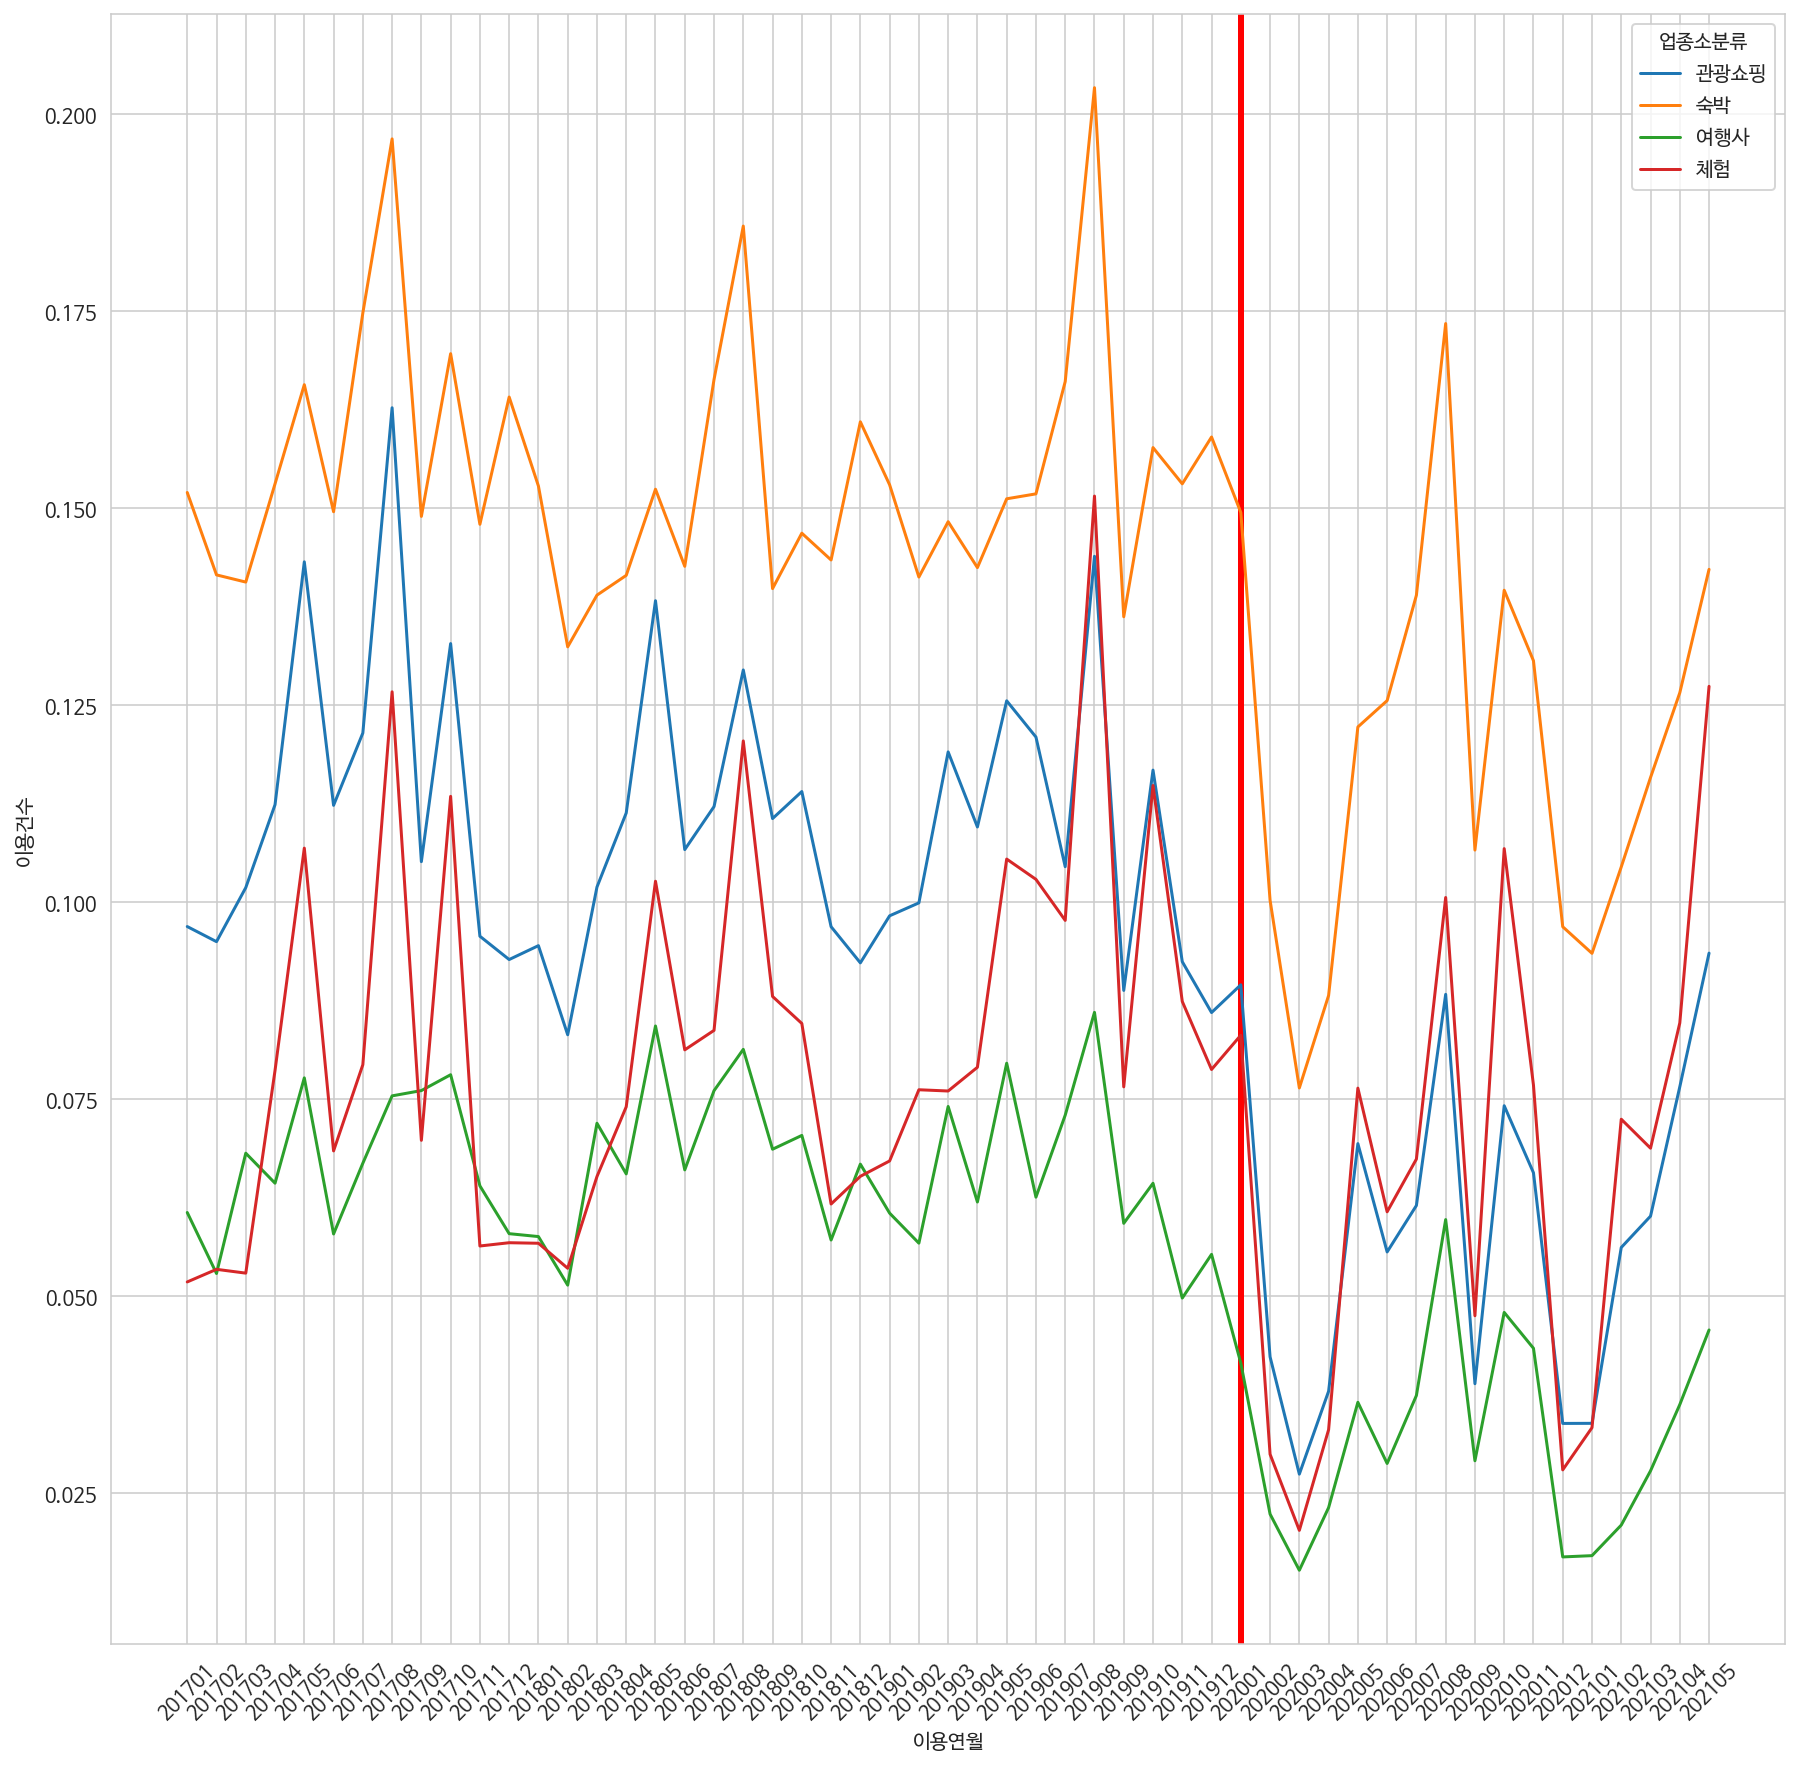

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 45)
plt.axvline(x=36, color = 'red', linewidth=3)
sns.lineplot(data= total, x='이용연월', y='이용건수', hue='업종소분류',ci=None)

In [ ]:
df['시군구'].nunique()

207